In [1]:
import keras
from keras.layers import LSTM
import numpy as np

Using TensorFlow backend.


In [2]:
from kp_data_loader import KPDataLoader

In [3]:
# Get data again just in case I messed up somewhere
loader = KPDataLoader()
for i in range(1,46):
    loader.load_file('ex{0}a.mid.csv'.format(i))
X, Y, m = loader.get_XX_and_YY()

In [4]:
from keras.preprocessing.sequence import pad_sequences
len(X)

45

In [5]:
X_pad = pad_sequences(X, maxlen=m, padding='post')
Y_pad = pad_sequences(Y, maxlen=m, padding='post')

In [6]:
sample_weights = np.ones((45, m))
for i in xrange(len(X)):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0

In [7]:
from keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Dropout
from keras.layers.wrappers import TimeDistributed

In [10]:
from keras.layers import Embedding

In [11]:
mask = np.zeros(12)
model.add(Masking(mask_value=mask, input_shape=(m, 12)))
model.add(LSTM(200, return_sequences=True, dropout_W=0.5, dropout_U=0.5))
model.add(TimeDistributed(Dense(12, activation="softmax")))

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              sample_weight_mode='temporal')

In [14]:
n = len(X)
j = int(n - (float(n) * 0.5))
X_train, X_test = X_pad[:j, :], X_pad[j:, :]

In [15]:
Y_train, Y_test = Y_pad[:j, :], Y_pad[j:, :]

In [16]:
sample_weights_train, sample_weights_test = sample_weights[:j, :], sample_weights[j:, :]

In [17]:
# # for custom metrics
import numpy as K

# def weighted_accuracy(y_true, y_pred):
#     score_array *= sample_weights
# score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))

def weighted_accuracy(y_true, y_pred):
    # Only for testing
#     score_array = K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1))
#     score_array *= weights
#     score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))
#     return K.mean(score_array)
    total = 0.0
    count = 0.0
    for i, y_i in enumerate(y_true):
        for j, y_ij in enumerate(y_i):
            if sum(y_ij) > 0:
                total += y_ij[y_pred[i][j]]
                count += 1
    return total / count

In [18]:
hist = model.fit(X_train, Y_train, batch_size=j, nb_epoch=20, sample_weight=sample_weights_train)

Epoch 1/20
22/22 [==============================] - 4s - loss: 11.5319
Epoch 2/20
22/22 [==============================] - 3s - loss: 11.3259
Epoch 3/20
22/22 [==============================] - 3s - loss: 11.1658
Epoch 4/20
22/22 [==============================] - 2s - loss: 11.2181
Epoch 5/20
22/22 [==============================] - 3s - loss: 11.0897
Epoch 6/20
22/22 [==============================] - 3s - loss: 11.1229
Epoch 7/20
22/22 [==============================] - 3s - loss: 11.0750
Epoch 8/20
22/22 [==============================] - 2s - loss: 10.9150
Epoch 9/20
22/22 [==============================] - 3s - loss: 11.1238
Epoch 10/20
22/22 [==============================] - 3s - loss: 10.8405
Epoch 11/20
22/22 [==============================] - 2s - loss: 10.7750
Epoch 12/20
22/22 [==============================] - 3s - loss: 10.8110
Epoch 13/20
22/22 [==============================] - 3s - loss: 10.6271
Epoch 14/20
22/22 [==============================] - 3s - loss: 10.7605
E

In [19]:
Y_prediction = model.predict_classes(X_test, batch_size=5)

23/23 [==============================] - 1s     


In [20]:
# Y_prediction = to_categorical(Y_prediction)
# weighted_accuracy(Y_test, Y_prediction, sample_weights_test)
weighted_accuracy(Y_test, Y_prediction)

0.15930316091954022

In [21]:
model.evaluate(X_test, Y_test, batch_size=20, sample_weight=sample_weights_test)

23/23 [==============================] - 1s     


6.534513597903044

In [22]:
Y_prediction[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 9, 9, 9, 9, 9, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [23]:
Y_prediction.shape

(23, 673)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
len(model.get_weights())

14

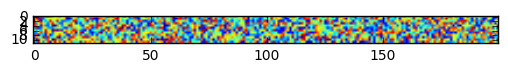

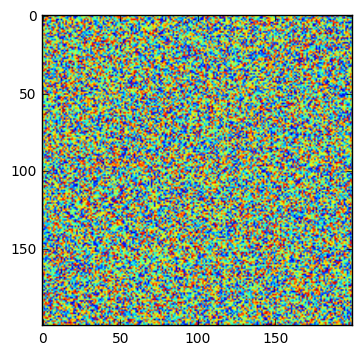

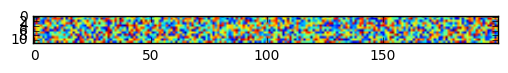

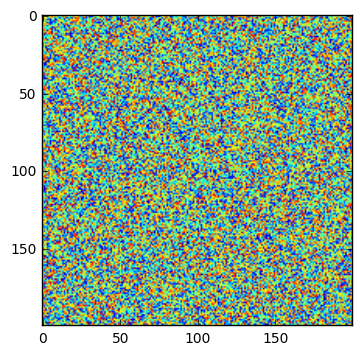

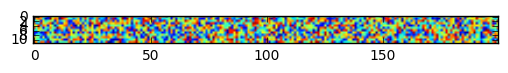

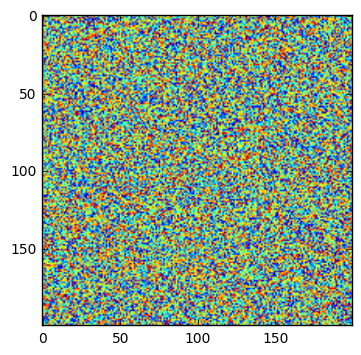

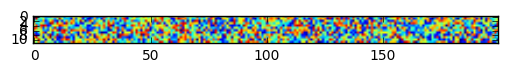

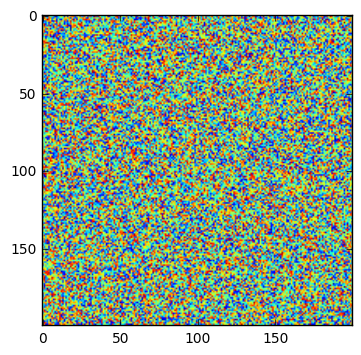

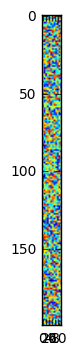

In [26]:
for w in model.get_weights():
    if len(w.shape) > 1:
        plt.figure()
        plt.imshow(w)

In [27]:
count = 0
for y in Y_prediction:
    if sum(y) > 0:
        count += 1
        print sum(y)
print count

63
59
1106
5364
630
45
4545
4572
598
41
1161
559
638
108
246
4903
1681
3398
126
3409
3373
21


In [30]:
hist.history

{'loss': [11.531874656677246,
  11.325876235961914,
  11.165759086608887,
  11.218059539794922,
  11.089678764343262,
  11.122891426086426,
  11.074996948242188,
  10.915010452270508,
  11.123805046081543,
  10.840520858764648,
  10.775020599365234,
  10.810955047607422,
  10.627058029174805,
  10.760527610778809,
  10.73375415802002,
  10.444340705871582,
  10.705324172973633,
  10.488801002502441,
  10.711670875549316,
  10.357525825500488]}

In [33]:
import cPickle
with open('test.pkl', 'w') as f:
    test = 100, hist
    cPickle.dump(test, f)

TypeError: can't pickle module objects

In [32]:
with open('test.pkl', 'r') as f:
    test = cPickle.load(f)
    print test

(100, {'loss': [11.531874656677246, 11.325876235961914, 11.165759086608887, 11.218059539794922, 11.089678764343262, 11.122891426086426, 11.074996948242188, 10.915010452270508, 11.123805046081543, 10.840520858764648, 10.775020599365234, 10.810955047607422, 10.627058029174805, 10.760527610778809, 10.73375415802002, 10.444340705871582, 10.705324172973633, 10.488801002502441, 10.711670875549316, 10.357525825500488]})
